In [7]:
%reload_ext autoreload
%autoreload 2

%env CUBLAS_WORKSPACE_CONFIG=:4096:8

from pathlib import Path

import matplotlib.pyplot  as plt
import torch
import torch.backends.cudnn

from gamm23.utils import seed

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.size": 16
})

torch.set_grad_enabled(False)
torch.set_default_dtype(torch.float64)

env: CUBLAS_WORKSPACE_CONFIG=:4096:8


In [8]:
SEED = 314176
seed(SEED)
DEVICE = torch.device("cuda:0")

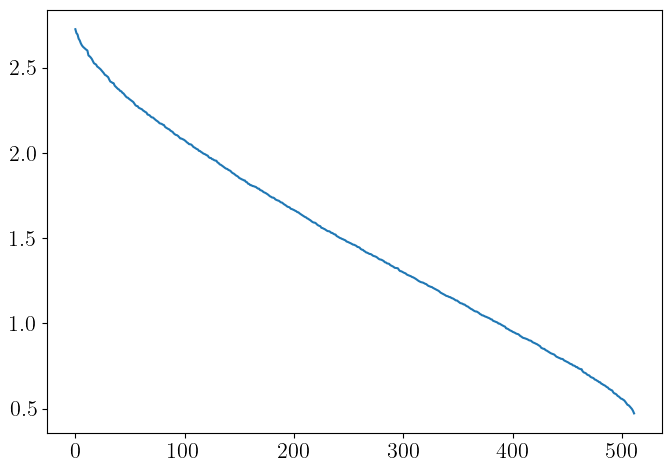

In [15]:
A = torch.load(Path(".").parent.joinpath("src", "gamm23", "operators", "matrix.pth")).to(DEVICE).to(torch.get_default_dtype())
U, S, V_T = torch.linalg.svd(A[0].to("cpu"), full_matrices=True)
U, S, V_T = U.to(DEVICE), S.to(DEVICE), V_T.to(DEVICE)
plt.figure(figsize=(7,5))
plt.plot(S.detach().to("cpu").numpy())
plt.tight_layout()
plt.show()

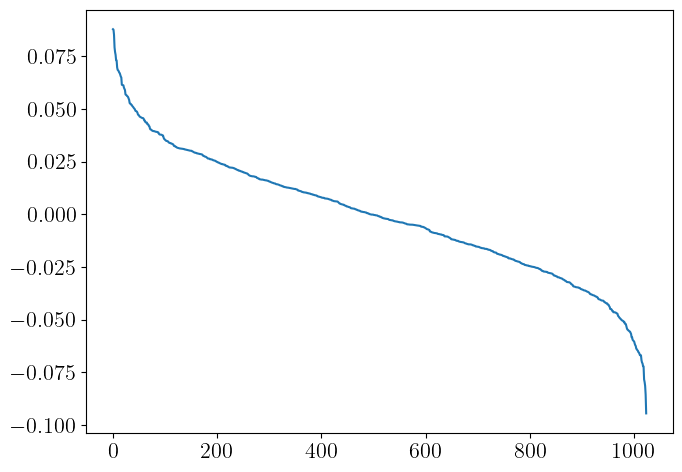

In [24]:
noise = 0.03*torch.randn((1024,1), device=DEVICE)
plt.figure(figsize=(7,5))
plt.plot((V_T@noise).sort(descending=True, dim=0)[0].detach().to("cpu").numpy())
plt.tight_layout()
plt.show()